In [1]:
import os
import sys
# Adding the notebook directory to the sys path
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
root = os.path.dirname(notebook_dir)
sys.path.append(os.path.join(root))
import numpy as np
from src.decision import Decision
from src.outcome import Outcome
from src.event import Event
from src.decision_evaluation import evaluate_decision
from src.visualization import plot_distribution, plot_utility_distribution, plot_decision_utility_distribution

In [2]:
# Create a decision
decision = Decision("Vacation Destination")

In [3]:
# Define probabilistic events
event1 = Event("Good Weather", "normal", {'mean': 0.7, 'std': 0.1})
event2 = Event("Affordable Prices", "uniform", {'start': 0.5, 'end': 0.8})
event3 = Event("Interesting Activities", "binomial", {'n': 10, 'p': 0.6})

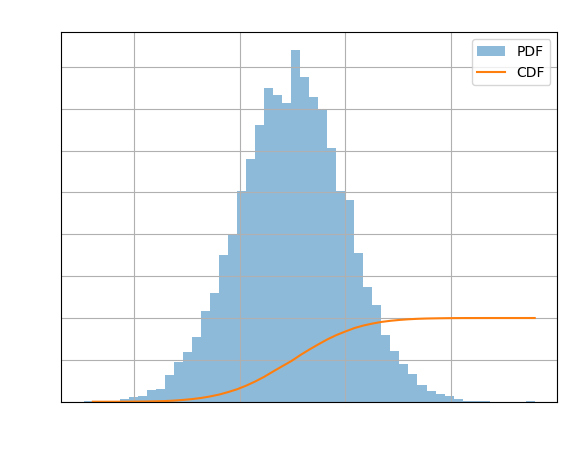

Statistics for Good Weather:
  Mean: 0.70
  Median: 0.70
  Standard Deviation: 0.10
  25th percentile: 0.63
  75th percentile: 0.77


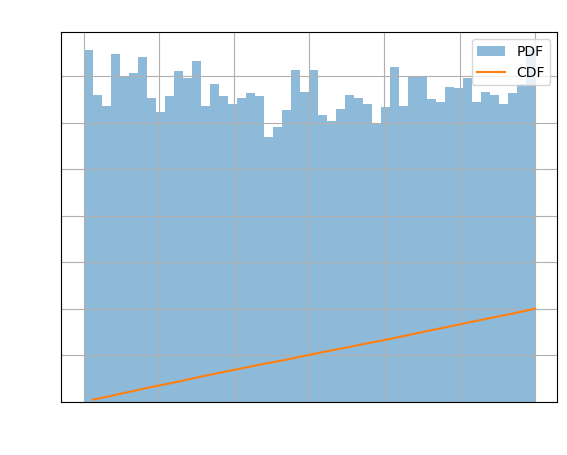

Statistics for Affordable Prices:
  Mean: 0.65
  Median: 0.65
  Standard Deviation: 0.09
  25th percentile: 0.57
  75th percentile: 0.73


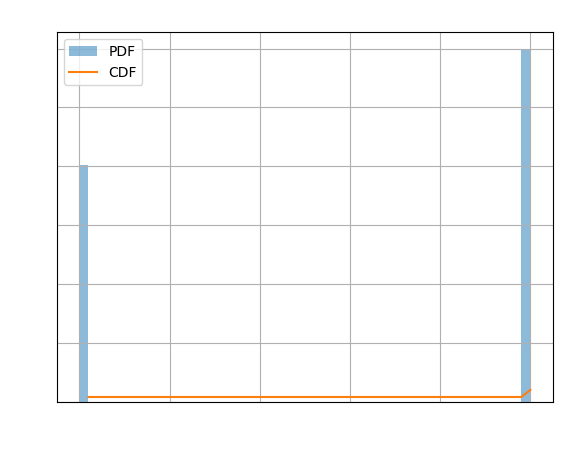

Statistics for Interesting Activities:
  Mean: 0.60
  Median: 1.00
  Standard Deviation: 0.49
  25th percentile: 0.00
  75th percentile: 1.00


In [4]:
# Plot probability distributions for each event
plot_distribution(event1.sample(), "Good Weather")
plot_distribution(event2.sample(), "Affordable Prices")
plot_distribution(event3.sample(), "Interesting Activities")

In [5]:
# Create complementary events
not_event1 = event1.complementary_event()
not_event2 = event2.complementary_event()
not_event3 = event3.complementary_event()

In [6]:
# Define outcomes
outcome1 = Outcome("Beach Vacation", decision.name, [event1, event2], lambda x, y: x * y, lambda x: x * 100)
outcome2 = Outcome("City Tour", decision.name, [event2, event3], lambda x, y: x * y, lambda x: x * 80)
outcome3 = Outcome("Mountain Retreat", decision.name, [event1, event3], lambda x, y: x * y, lambda x: x * 120)
outcome4 = Outcome("Stay Home", decision.name, [not_event1, not_event2, not_event3], lambda x, y, z: x * y * z, lambda x: x * 50)



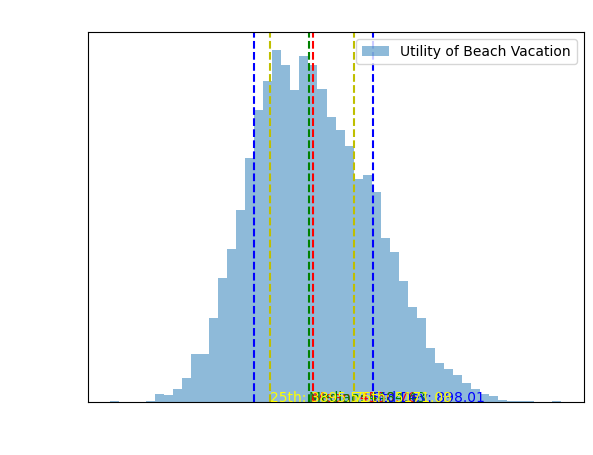

Statistics for Utility of Beach Vacation:
  Mean: 4550.76
  Median: 4484.43
  Standard Deviation: 898.01
  25th percentile: 3895.51
  75th percentile: 5171.08


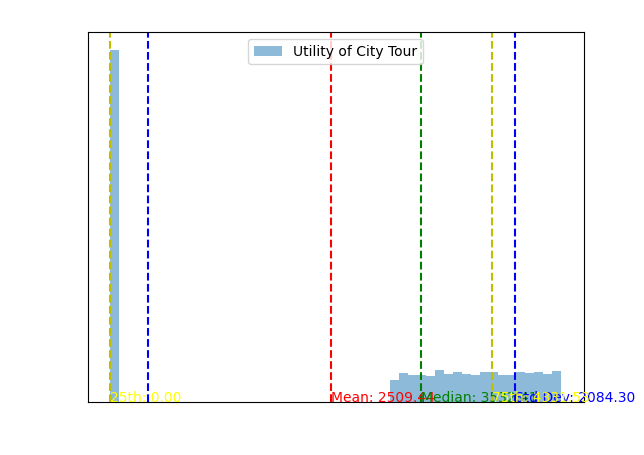

Statistics for Utility of City Tour:
  Mean: 2509.44
  Median: 3532.41
  Standard Deviation: 2084.30
  25th percentile: 0.00
  75th percentile: 4331.53


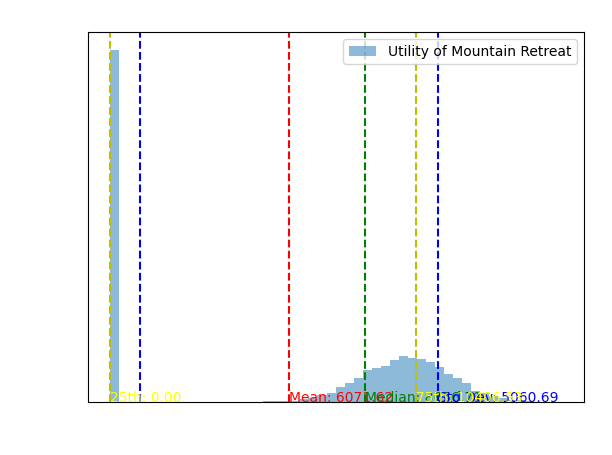

Statistics for Utility of Mountain Retreat:
  Mean: 6071.62
  Median: 8656.71
  Standard Deviation: 5060.69
  25th percentile: 0.00
  75th percentile: 10406.53


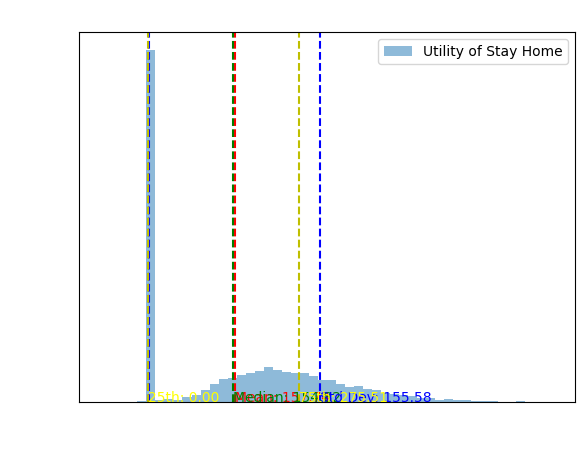

Statistics for Utility of Stay Home:
  Mean: 157.74
  Median: 154.82
  Standard Deviation: 155.58
  25th percentile: 0.00
  75th percentile: 275.51


In [8]:
# Plot utility distributions for each outcome
plot_utility_distribution(outcome1.compute_utility()[1], outcome1.utility_formula, "Beach Vacation")
plot_utility_distribution(outcome2.compute_utility()[1], outcome2.utility_formula, "City Tour")
plot_utility_distribution(outcome3.compute_utility()[1], outcome3.utility_formula, "Mountain Retreat")
plot_utility_distribution(outcome4.compute_utility()[1], outcome4.utility_formula, "Stay Home")


In [ ]:
# Add outcomes to the decision
decision.add_outcome(outcome1)
decision.add_outcome(outcome2)
decision.add_outcome(outcome3)

In [ ]:
# Print decision details
print("Decision:", decision.name)
print("Outcomes:")
for outcome in decision.get_outcomes():
    print("- Name:", outcome.name)
    print("  Events:")
    for event in outcome.events:
        print("  - Name:", event.name)
        print("    Distribution Type:", event.distribution_type)
        print("    Parameters:", event.params)
    print("  Combination Formula:", outcome.combine_formula.__name__)
    print("  Utility Function:", outcome.utility_function.__name__)
    print()

In [ ]:
# Evaluate the decision
final_utilities, weighted_average_utility, all_utility_samples = evaluate_decision(decision.get_outcomes())

In [ ]:
# Plot decision utility distribution
plot_decision_utility_distribution(decision, all_utility_samples, decision.name, colors=None, fig_size=(10, 6))

In [ ]:
# Print evaluation results
print("Evaluation Results:")
print("Final Utilities:")
print(final_utilities)
print("Weighted Average Utility:", weighted_average_utility)
print("All Utility Samples:")
for i, utility_samples in enumerate(all_utility_samples):
    print(f"Outcome {i+1}: {utility_samples}")